### Importing and Cleaning Dataset

In [1]:
# importing libraries as needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.api import add_constant
%matplotlib inline
sns.set()

/Users/laetitia/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/Users/laetitia/IronHack/data-ft-par-labs/Projects/Week-5_6/hotel_bookings.csv')

In [3]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [4]:
df.shape

(119390, 32)

#### Getting country code names from the internet

In [5]:
# Getting Country data from google

# countries = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-1')
# len(countries)
# countries1 = countries[1]

# Assigning Country Names

# countries2 = countries1.drop(['Alpha-2 code', 'Numeric code', 'Link to ISO 3166-2 subdivision codes', 'Independent'], axis=1)
# change_name = countries2.rename(columns={'Alpha-3 code':'country'})
# data = df1.merge(change_name, on='country', how='left')

# Renaming Country Names

# data1 = data.rename(columns={'English short name (using title case)':'country_name', 'country':'country_code'})
# hotel_bookings = data1.copy()

# Updating missing names

# hotel_bookings.loc[hotel_bookings .country_code == 'CN', 'country_name'] = 'China' 
# hotel_bookings.loc[hotel_bookings .country_code == 'TMP', 'country_name'] = 'East Timor'

# hotel_bookings.head(2)

----

### Visualizations

#### 1. Revenue per Trip

- 1. First we determine the average daily rates

In [6]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [7]:
# Checking the adr shows we have some outliers like -6.38 and 5400

pd.qcut(df['adr'], 4).value_counts()

(94.575, 126.0]    30511
(-6.381, 69.29]    29870
(69.29, 94.575]    29825
(126.0, 5400.0]    29184
Name: adr, dtype: int64

<AxesSubplot:xlabel='adr'>

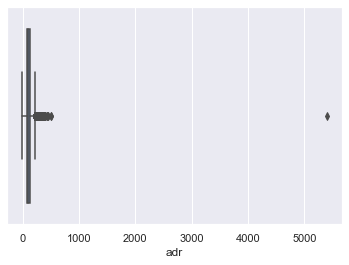

In [8]:
sns.boxplot(x=df['adr'])

In [9]:
# Dropping values below 0 and above 5400

df = df.loc[(df['adr']>20) & (df['adr']<400)]
pd.qcut(df['adr'], 4).value_counts()

(71.0, 95.0]                  29822
(20.878999999999998, 71.0]    29253
(126.0, 397.38]               29176
(95.0, 126.0]                 28751
Name: adr, dtype: int64

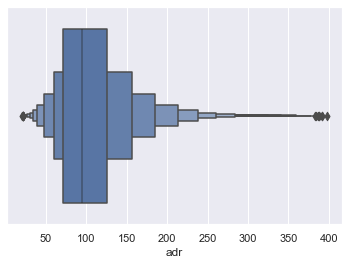

In [10]:
# Plotting boxplot to see if better

sns.boxenplot(x=df['adr'])
plt.show()

In [11]:
df.shape

(117002, 32)

In [12]:
# Calculating the revenue per total stay from the adr(average daily rate)

df['revenue_per_stay'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])
df.head(3)                                                             

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue_per_stay
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,196.0


In [58]:
# Calculating the yearly revenue

revenue_yearly = df.groupby(['arrival_date_year', 'hotel'])['revenue_per_stay'].sum().reset_index()
revenue_yearly

,arrival_date_year,hotel,revenue_per_stay
0,2015,City Hotel,3289853.65
1,2015,Resort Hotel,3522684.48
2,2016,City Hotel,11780467.15
3,2016,Resort Hotel,7078297.55
4,2017,City Hotel,10196065.59
5,2017,Resort Hotel,6820783.89


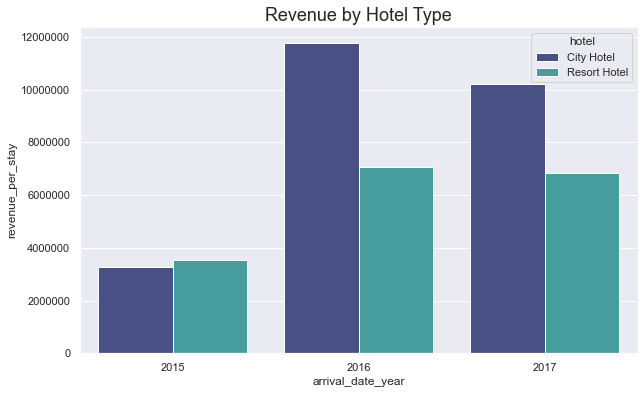

In [62]:
# Plotting yearly revenue

plt.figure(figsize=(10,6))
sns.barplot(data=revenue_yearly, x='arrival_date_year', y='revenue_per_stay',  hue = 'hotel' , palette='mako')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('Revenue 2016.png', dpi=300, bbox_inches='tight')
plt.title('Revenue by Hotel Type', fontsize =18)
plt.show()

In [15]:
# Calculating the monthly revenue

revenue_monthly = df.groupby(['arrival_date_year','arrival_date_month'])['revenue_per_stay'].sum()
revenue_monthly  = revenue_monthly.reset_index()
revenue_monthly;

In [47]:
# Calculating the monthly revenue

revenue_month = df.groupby(['hotel'])['revenue_per_stay'].sum()
revenue_month  = revenue_monthly.reset_index()
revenue_month

,index,hotel,revenue_per_stay
0,0,City Hotel,25266386.39
1,1,Resort Hotel,17421765.92


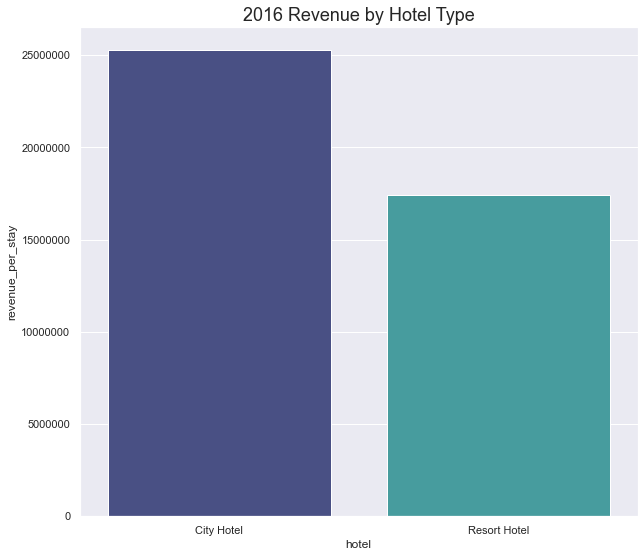

In [54]:
plt.figure(figsize=(10,9))
# months = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot(data=revenue_month, x='hotel', y='revenue_per_stay', 
            palette='mako')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('Revenue 2016.png', dpi=300, bbox_inches='tight')
plt.title('2016 Revenue by Hotel Type', fontsize =18)
plt.show()

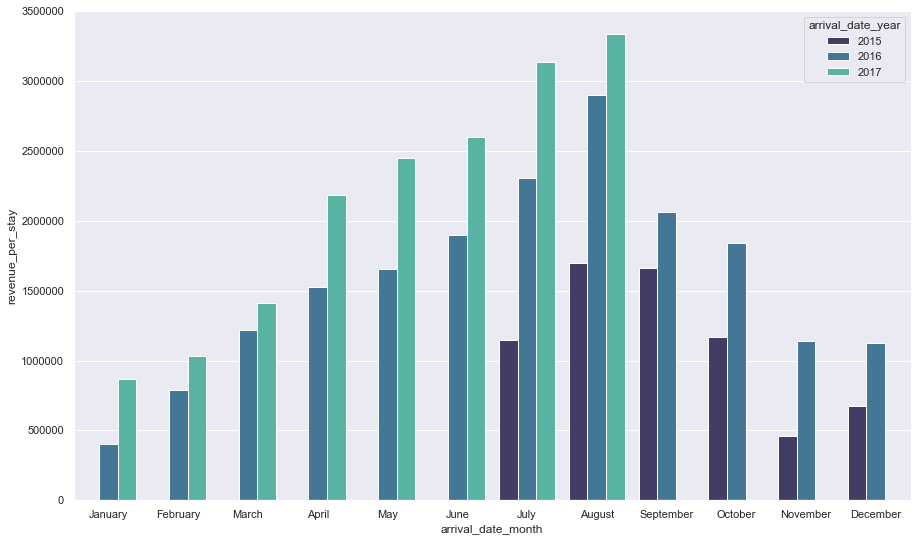

In [16]:
# Plotting montly revenue

plt.figure(figsize=(15,9))
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot(data=revenue_monthly, x='arrival_date_month', y='revenue_per_stay', hue='arrival_date_year', 
            palette='mako', order=months)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Observations

- Data is complete only for 2016
- Revenue seem to be higher during summer months (June, July, August)

#### Data is complete for 2016, so we drop 2015 and 2017 data and use 2016 data for our ananlysis model prediction

In [17]:
hotel_bookings_2016 = df[df['arrival_date_year'] == 2016]
hotel_bookings_2016.shape

(55608, 33)

In [18]:
hotel_bookings_2016.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue_per_stay
104147,City Hotel,0,107,2016,December,53,31,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,B,0,No Deposit,28.0,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07,724.99
104216,City Hotel,0,310,2016,December,53,27,2,10,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,9.0,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08,822.84
104219,City Hotel,0,310,2016,December,53,27,2,10,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,9.0,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08,822.84


In [19]:
hotel_type_cancel = hotel_bookings_2016.groupby(['hotel'])['is_canceled'].count().reset_index()
hotel_type_cancel

,hotel,is_canceled
0,City Hotel,37496
1,Resort Hotel,18112


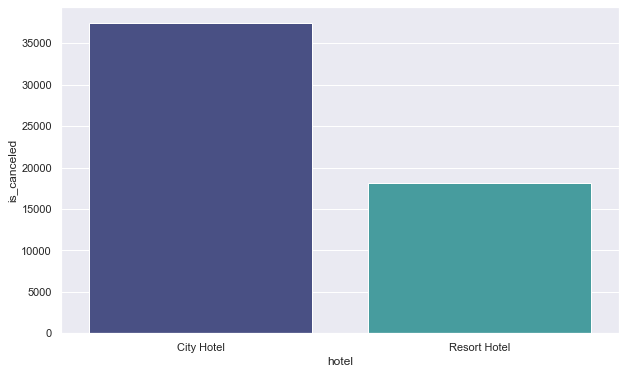

In [20]:
# Plotting cancellation by hotel type

plt.figure(figsize=(10,6))
sns.barplot(data=hotel_type_cancel, x='hotel', y='is_canceled',  palette='mako')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# more cancelations at the city hotels than resort

In [21]:
# which is more expensive on average, city hotel or resort?

hotel_type_revenue = hotel_bookings_2016.groupby(['hotel'])['adr'].mean().reset_index()
hotel_type_revenue

,hotel,adr
0,City Hotel,105.082739
1,Resort Hotel,89.898830


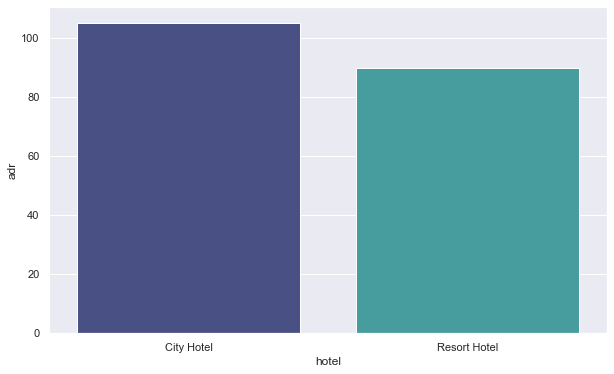

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=hotel_type_revenue, x='hotel', y='adr', palette='mako')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

---

#### Outliers

#### Dropping weeeknights greter 5 and weekend nights greater than 2

- Some stays are for months and influence pricing, thus dropped from dataframe for better model preediction

In [23]:
hotel_bookings_2016 = hotel_bookings_2016.loc[(hotel_bookings_2016['stays_in_weekend_nights']<=2) &
                                             (hotel_bookings_2016['stays_in_week_nights']<=5)] 
                                             
hotel_bookings_2016.shape

(53317, 33)

---

#### Dropping columns as needed

In [24]:
bookings_2016 = hotel_bookings_2016.drop(['arrival_date_year','adr','agent','company',
                                         'arrival_date_week_number','arrival_date_day_of_month','is_canceled',
                                         'country','lead_time','booking_changes','reservation_status_date',
                                         'assigned_room_type','total_of_special_requests'], axis=1)
bookings_2016.shape

(53317, 20)

In [25]:
bookings_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53317 entries, 3738 to 104147
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           53317 non-null  object 
 1   arrival_date_month              53317 non-null  object 
 2   stays_in_weekend_nights         53317 non-null  int64  
 3   stays_in_week_nights            53317 non-null  int64  
 4   adults                          53317 non-null  int64  
 5   children                        53317 non-null  float64
 6   babies                          53317 non-null  int64  
 7   meal                            53317 non-null  object 
 8   market_segment                  53317 non-null  object 
 9   distribution_channel            53317 non-null  object 
 10  is_repeated_guest               53317 non-null  int64  
 11  previous_cancellations          53317 non-null  int64  
 12  previous_bookings_not_cancel

In [26]:
pd.qcut(bookings_2016['revenue_per_stay'],5).value_counts()

(24.999, 124.0]      11004
(210.0, 300.0]       10865
(438.99, 2384.97]    10659
(300.0, 438.99]      10438
(124.0, 210.0]       10351
Name: revenue_per_stay, dtype: int64

### Checking for correlations

In [27]:
bookings_2016.corr().revenue_per_stay.abs().sort_values()

required_car_parking_spaces       0.020490
days_in_waiting_list              0.040611
babies                            0.051604
previous_cancellations            0.055212
previous_bookings_not_canceled    0.072319
is_repeated_guest                 0.127232
children                          0.243328
adults                            0.263577
stays_in_weekend_nights           0.463189
stays_in_week_nights              0.650361
revenue_per_stay                  1.000000
Name: revenue_per_stay, dtype: float64

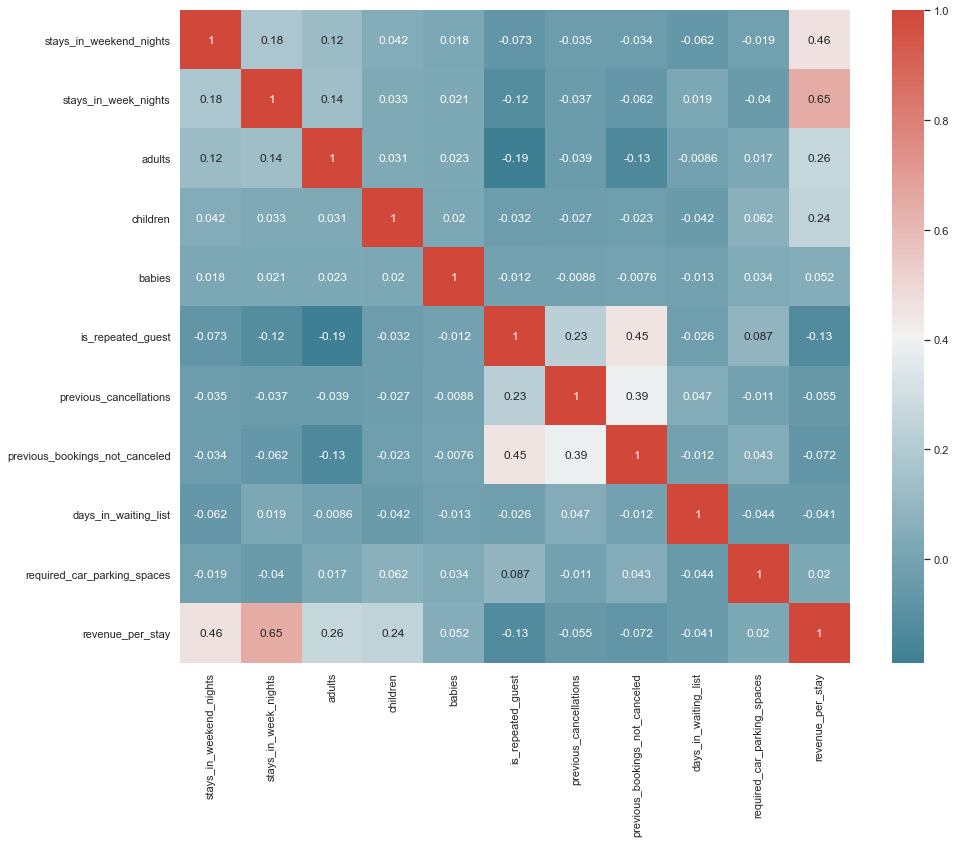

In [28]:
plt.figure(figsize=(15,12))
cmap = sns.diverging_palette(220, 15, as_cmap=True)
# sns.set(font_scale=1.2)
sns.heatmap(bookings_2016.corr(), annot=True, annot_kws={"fontsize":12}, cmap=cmap)
plt.savefig('Model Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

---

### Linear Regression

Modeling data to predict the pricing of hotel rooms

#### Predicting daily rates

In [29]:
bookings_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53317 entries, 3738 to 104147
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           53317 non-null  object 
 1   arrival_date_month              53317 non-null  object 
 2   stays_in_weekend_nights         53317 non-null  int64  
 3   stays_in_week_nights            53317 non-null  int64  
 4   adults                          53317 non-null  int64  
 5   children                        53317 non-null  float64
 6   babies                          53317 non-null  int64  
 7   meal                            53317 non-null  object 
 8   market_segment                  53317 non-null  object 
 9   distribution_channel            53317 non-null  object 
 10  is_repeated_guest               53317 non-null  int64  
 11  previous_cancellations          53317 non-null  int64  
 12  previous_bookings_not_cancel

In [30]:
bookings_2016.nunique()

hotel                                2
arrival_date_month                  12
stays_in_weekend_nights              3
stays_in_week_nights                 6
adults                               5
children                             4
babies                               4
meal                                 5
market_segment                       7
distribution_channel                 4
is_repeated_guest                    2
previous_cancellations               9
previous_bookings_not_canceled      57
reserved_room_type                   8
deposit_type                         3
days_in_waiting_list                93
customer_type                        4
required_car_parking_spaces          4
reservation_status                   3
revenue_per_stay                  8074
dtype: int64

In [31]:
# Creating dummies for categorical data

hotel_booking = pd.get_dummies(data=bookings_2016, columns=['arrival_date_month','meal','market_segment',
                                                            'distribution_channel','reserved_room_type',
                                                            'deposit_type','customer_type',
                                                            'reservation_status','hotel'],drop_first=True)                                                                                                                                                   

#### Creating Features (independent variables) and Targets (dependent variables)

In [32]:
# The dependent variable (target) is the revenue_per_stay passed as revenue
# Target are the independent variables passed in the dataframe, X

X, revenue = add_constant(hotel_booking, has_constant='add').drop('revenue_per_stay', axis=1), hotel_booking.revenue_per_stay

#### Generating the model via Ordinary Least Squares

In [33]:
model_fit = OLS(revenue.map(np.log), X).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:       revenue_per_stay   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     4986.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:34:28   Log-Likelihood:                -14336.
No. Observations:               53317   AIC:                         2.877e+04
Df Residuals:                   53267   BIC:                         2.922e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

---

- From the model above, there are a few independent variables such as reservation cancelled that are insignificant
- These insignificant variables will be dropped to improve model prediction
- There is also an indication of multicolinearity, that is some independent variables are dependent on each other, these are to be eliminated and the aim is to have no multicolinearity

#### Improving Regression Model

In [34]:
columns_to_drop = ['market_segment_Direct','customer_type_Group']

model_fit = OLS(revenue.map(np.log), X.drop(columns_to_drop, axis=1)).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       revenue_per_stay   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     5198.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:34:28   Log-Likelihood:                -14338.
No. Observations:               53317   AIC:                         2.877e+04
Df Residuals:                   53269   BIC:                         2.920e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.1459      0.020    209.701      0.000       4.107       4.185
stays_in_weekend_nights            0.3159      0.002    180.726      0.000       0.312       0.319
stays_in_week_nights               0.3272      0.001    298.106      0.000       0.325       0.329
adults                             0.1066      0.003     33.746      0.000       0.100       0.113
children                           0.0804      0.005     17.246      0.000       0.071       0.090
babies                             0.0544      0.014      3.872      0.000       0.027       0.082
is_repeated_guest                 -0.0913      0.010     -8.950      0.000      -0.111      -0.071
previous_cancellations             0.0176      0.004      4.562      0.000       0.010       0.025
previous_bookings_not_canceled    -0.0047      0.001     -4.143      0.000      -0.007      -0.002
days_in_waiting_list              -0.0003   5.87e-05     -4.790      0.000      -0.000      -0.000
required_car_parking_spaces        0.0985      0.006     17.127      0.000       0.087       0.110
arrival_date_month_August          0.3082      0.006     47.422      0.000       0.295       0.321
arrival_date_month_December       -0.0891      0.007    -12.860      0.000      -0.103      -0.076
arrival_date_month_February       -0.1779      0.007    -25.724      0.000      -0.191      -0.164
arrival_date_month_January        -0.2531      0.008    -30.398      0.000      -0.269      -0.237
arrival_date_month_July            0.2209      0.007     33.109      0.000       0.208       0.234
arrival_date_month_June            0.1872      0.006     29.373      0.000       0.175       0.200
arrival_date_month_March          -0.1111      0.006    -17.173      0.000      -0.124      -0.098
arrival_date_month_May             0.1239      0.006     19.761      0.000       0.112       0.136
arrival_date_month_November       -0.0604      0.007     -9.113      0.000      -0.073      -0.047
arrival_date_month_October         0.0896      0.006     14.774      0.000       0.078       0.101
arrival_date_month_September       0.2373      0.006     37.785      0.000       0.225       0.250
meal_FB                            0.5575      0.019     30.005      0.000       0.521       0.594
meal_HB                            0.2826      0.005     58.722      0.000       0.273       0.292
meal_SC                           -0.1479      0.005    -27.781      0.000      -0.158      -0.137
meal_Undefined                     0.6397      0.014     44.366      0.000       0.611       0.668
market_segment_Complementary      -0.4644      0.073     -6.368      0.000      -0.607      -0.321
market_segment_Corporate          -0.2292      0.014    -16.743      0.000      -0.256      -0.202
market_segment

---

### Checking Assumptions

In [35]:
import Assumptions

Fitting linear regression

R^2: 0.8198413336835715 

Coefficients
-------------------------------------
Intercept: 4.38709004271015
stays_in_weekend_nights: 0.32
stays_in_week_nights: 0.33
adults: 0.11
children: 0.08
babies: 0.05
is_repeated_guest: -0.1
previous_cancellations: 0.02
previous_bookings_not_canceled: -0.0
days_in_waiting_list: -0.0
required_car_parking_spaces: 0.1
arrival_date_month_August: 0.31
arrival_date_month_December: -0.09
arrival_date_month_February: -0.18
arrival_date_month_January: -0.25
arrival_date_month_July: 0.22
arrival_date_month_June: 0.19
arrival_date_month_March: -0.11
arrival_date_month_May: 0.12
arrival_date_month_November: -0.06
arrival_date_month_October: 0.09
arrival_date_month_September: 0.24
meal_FB: 0.57
meal_HB: 0.28
meal_SC: -0.14
meal_Undefined: 0.64
market_segment_Complementary: -0.52
market_segment_Corporate: -0.31
market_segment_Groups: -0.34
market_segment_Offline TA/TO: -0.26
distribution_channel_Direct: -0.03
distribution_channel_GDS: 0.

/Users/laetitia/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


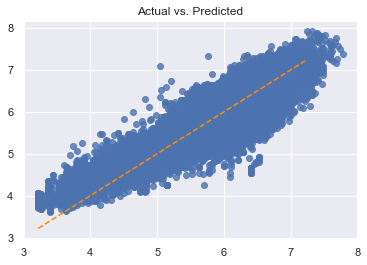

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with revenue_per_stay


children                          0.199213
babies                            0.035769
previous_cancellations           -0.057891
previous_bookings_not_canceled   -0.108001
days_in_waiting_list             -0.014857
required_car_parking_spaces      -0.026082
Name: revenue_per_stay, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with revenue_per_stay


stays_in_weekend_nights    0.484778
stays_in_week_nights       0.680926
adults                     0.312465
Name: revenue_per_stay, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


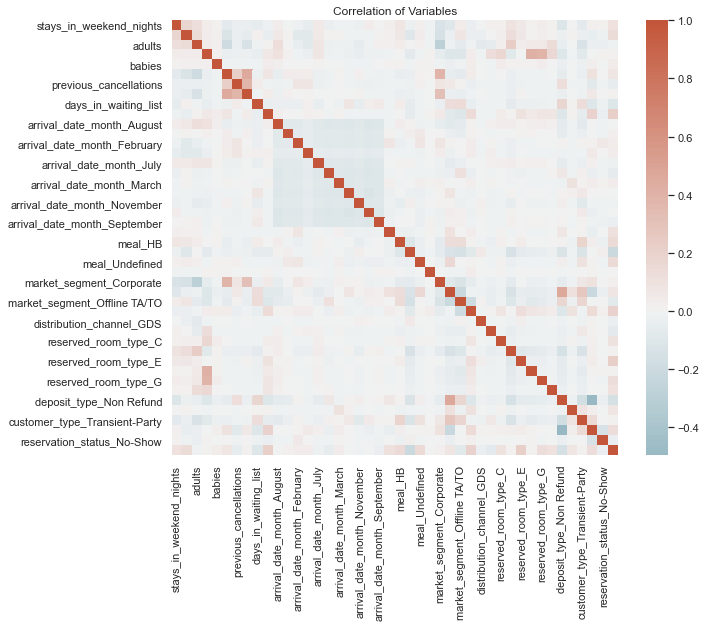

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
adults: 10.510316179666885
stays_in_week_nights: 4.073169438604094
reservation_status_Check-Out: 3.7472427165433198
market_segment_Groups: 2.795357724969486
deposit_type_Non Refund: 2.697129969055943
market_segment_Offline TA/TO: 2.236503763834146
stays_in_weekend_nights: 2.1169990725139862
customer_type_Transient-Party: 2.1030686773485243
hotel_Resort Hotel: 2.0565631282151626
children: 1.8741073425989676
arrival_date_month_October: 1.8425739829785726
arrival_date_month_August: 1.7596710780385532
arrival_date_month_May: 1.7387621196315648
arrival_date_month_September: 1.7351731053782187
arrival_date_month_June: 1.699169877128558
arrival_date_month_March: 1.6714040223028583
arrival_date_month_July: 1.663745549466727
arrival_date_month_November: 1.5783002463955207
arrival_date_month_February: 1.5496404395485

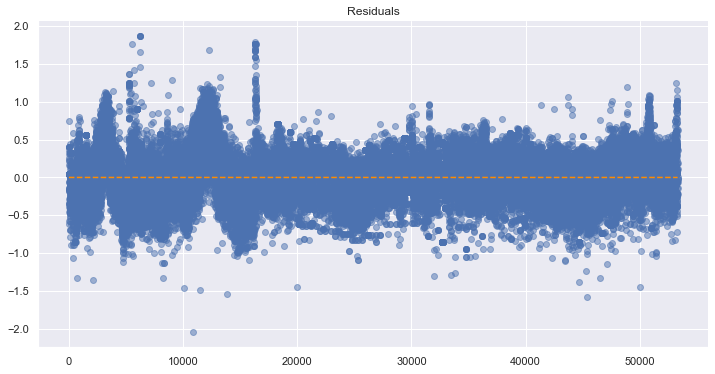

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 17576.69650238077,
 'pvalue for LM': 0.0,
 'F stats': 595.4338158229438,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/Users/laetitia/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


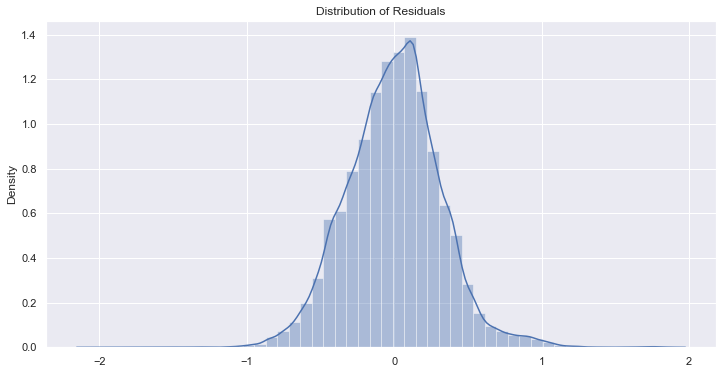


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


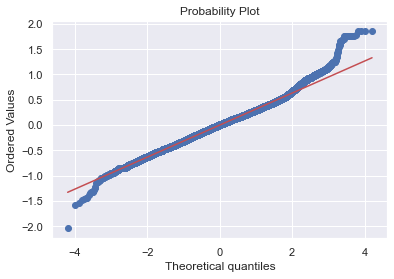


In your dataset you quite fat tails. You have 0.02 potential outliers (1087 rows)


{'Satisfied': [],
 'Potentially': ['Linearity',
  'Multicollinearity',
  'Autocorrelation',
  'Sub-Normality'],
 'Violated': ['Autocorrelation', 'Normality']}

In [36]:
tester = Assumptions.Assumption_Tester_OLS(X.drop(columns_to_drop+['const','customer_type_Transient',
                                                                  'distribution_channel_TA/TO',
                                                                  'market_segment_Online TA'],  axis=1),revenue.map(np.log))
                                                                                           
tester.run_all()

---

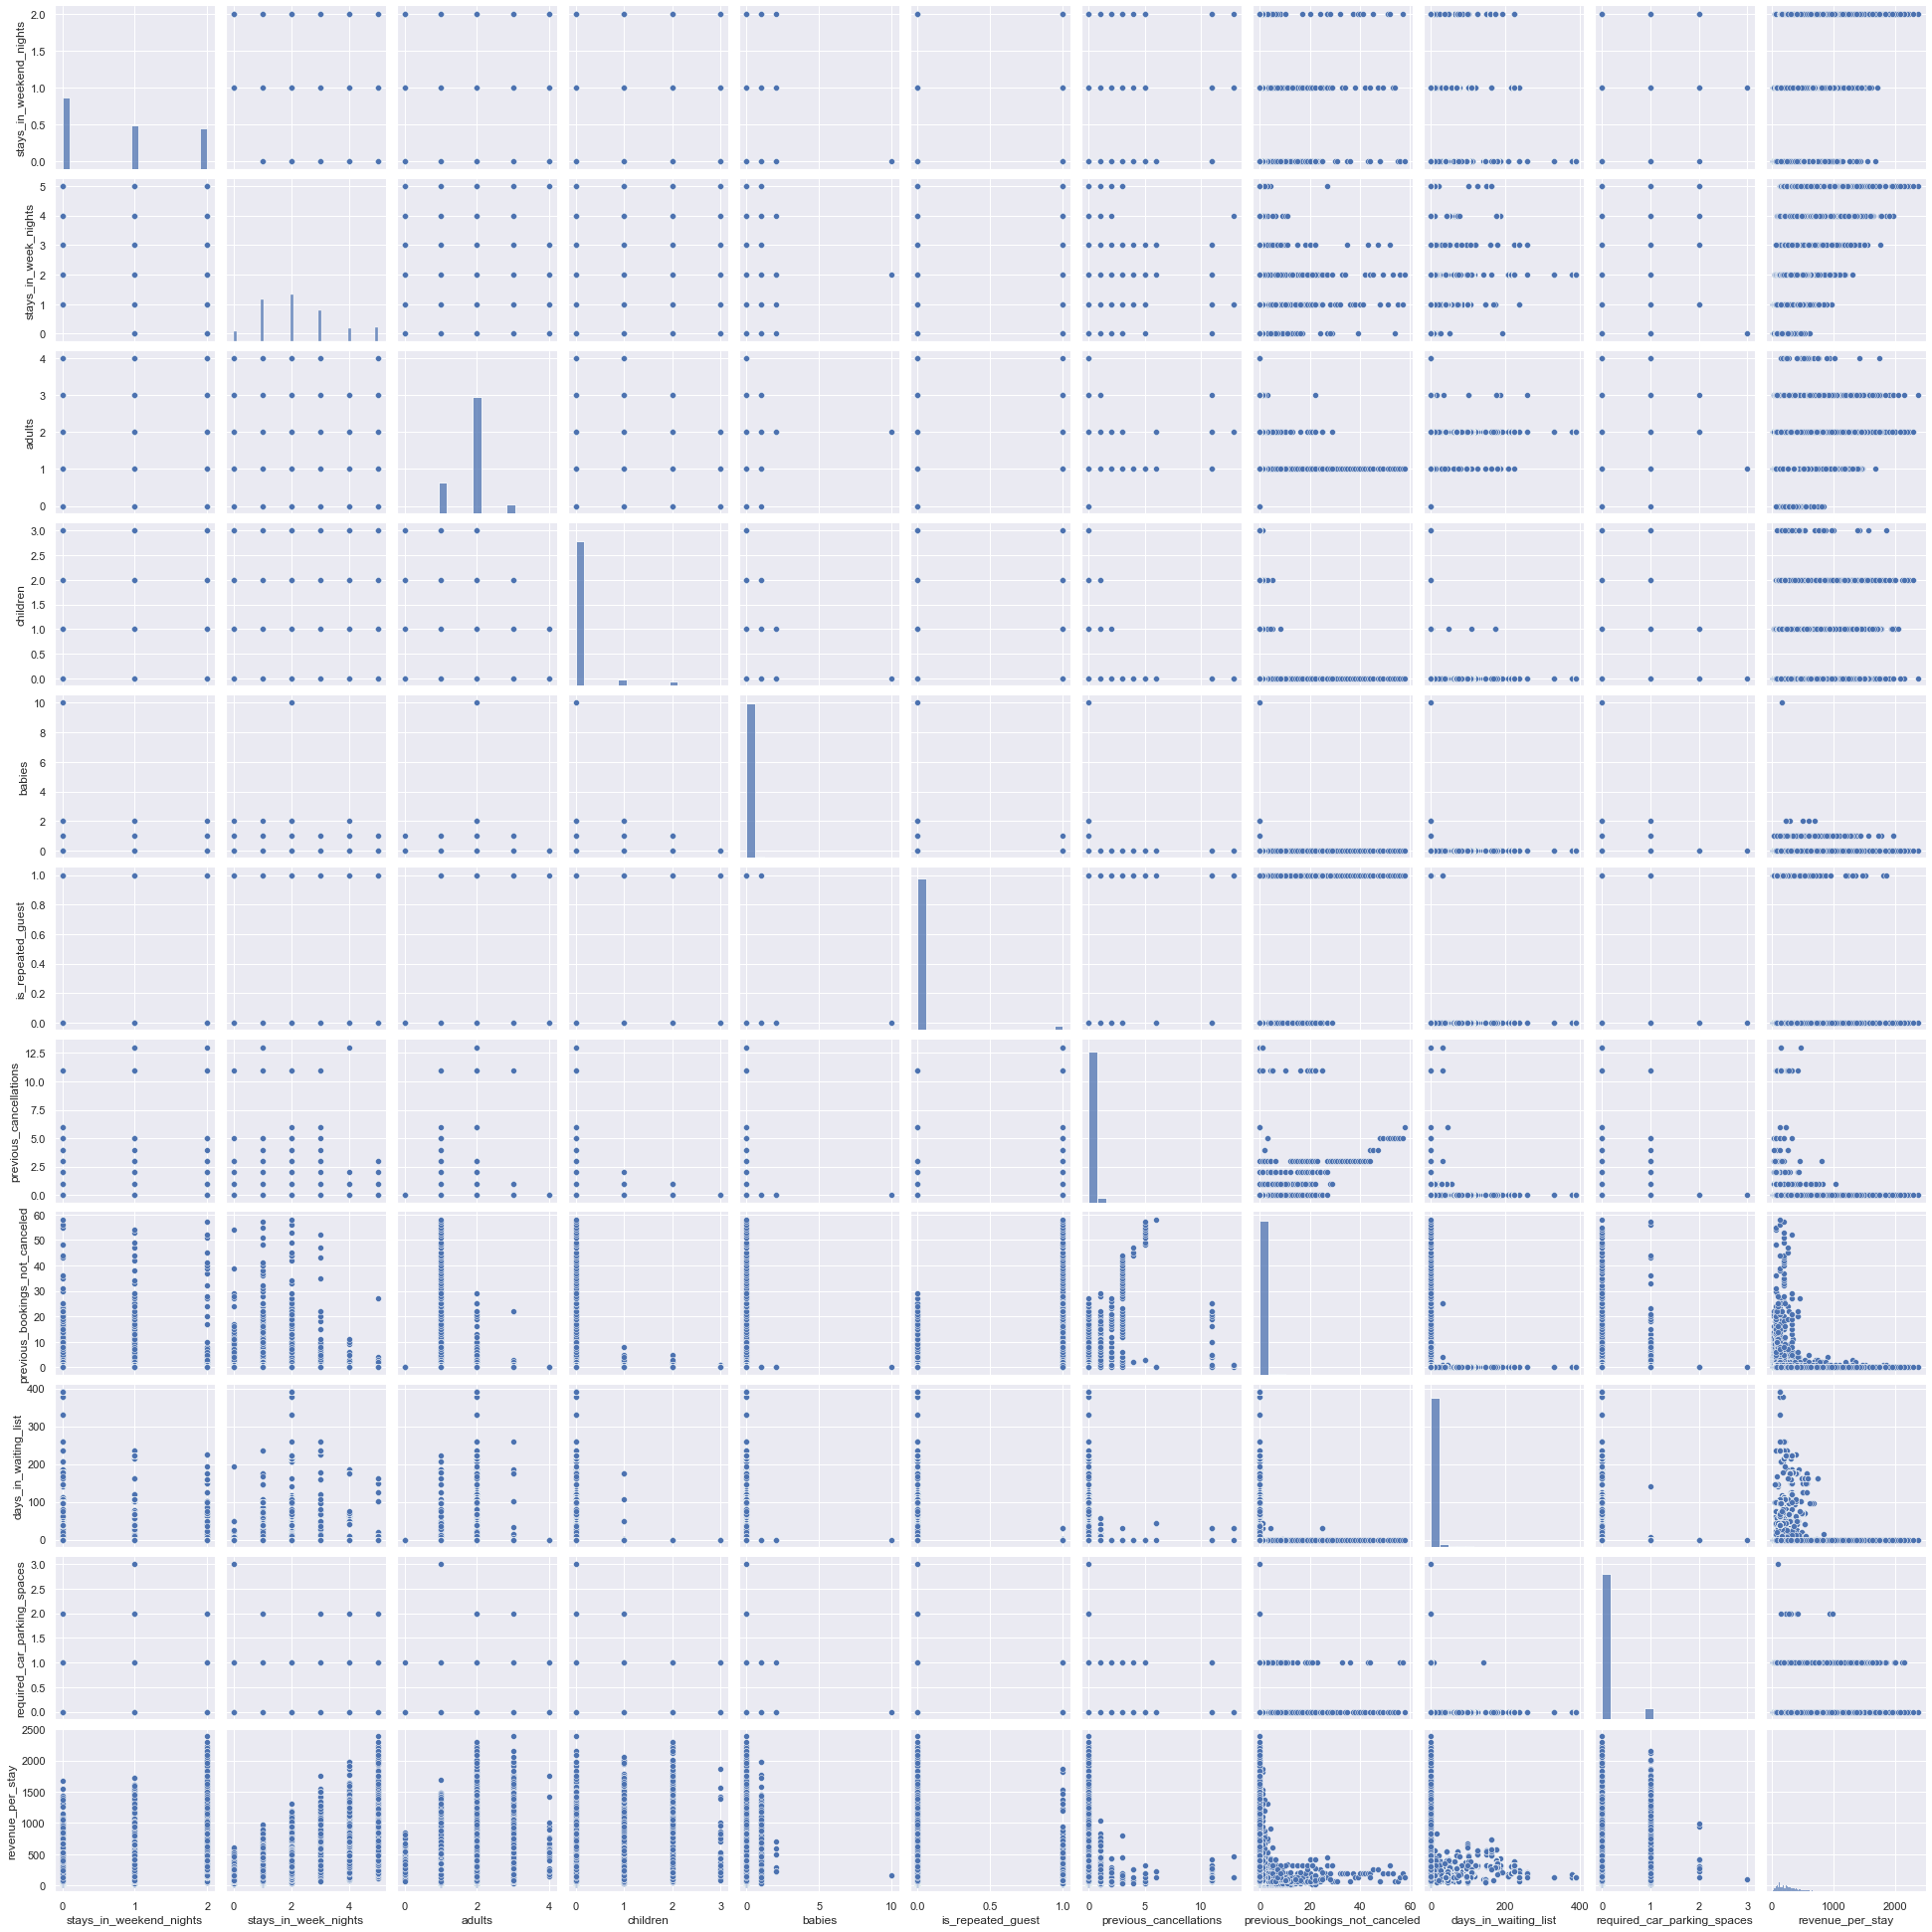

In [37]:
sns.pairplot(bookings_2016)

In [38]:
columns_to_drop = ['market_segment_Direct','reservation_status_No-Show']

model_fit = OLS(revenue.map(np.log), X.drop(columns_to_drop, axis=1)).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       revenue_per_stay   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     5198.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:35:05   Log-Likelihood:                -14337.
No. Observations:               53317   AIC:                         2.877e+04
Df Residuals:                   53269   BIC:                         2.920e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.1263      0.021    194.391      0.000       4.085       4.168
stays_in_weekend_nights            0.3159      0.002    180.710      0.000       0.313       0.319
stays_in_week_nights               0.3274      0.001    297.754      0.000       0.325       0.330
adults                             0.1069      0.003     33.863      0.000       0.101       0.113
children                           0.0804      0.005     17.249      0.000       0.071       0.090
babies                             0.0544      0.014      3.868      0.000       0.027       0.082
is_repeated_guest                 -0.0938      0.010     -9.144      0.000      -0.114      -0.074
previous_cancellations             0.0180      0.004      4.670      0.000       0.010       0.026
previous_bookings_not_canceled    -0.0047      0.001     -4.143      0.000      -0.007      -0.002
days_in_waiting_list              -0.0003   5.87e-05     -4.775      0.000      -0.000      -0.000
required_car_parking_spaces        0.0984      0.006     17.123      0.000       0.087       0.110
arrival_date_month_August          0.3083      0.006     47.440      0.000       0.296       0.321
arrival_date_month_December       -0.0892      0.007    -12.880      0.000      -0.103      -0.076
arrival_date_month_February       -0.1786      0.007    -25.848      0.000      -0.192      -0.165
arrival_date_month_January        -0.2532      0.008    -30.408      0.000      -0.270      -0.237
arrival_date_month_July            0.2212      0.007     33.144      0.000       0.208       0.234
arrival_date_month_June            0.1875      0.006     29.420      0.000       0.175       0.200
arrival_date_month_March          -0.1111      0.006    -17.186      0.000      -0.124      -0.098
arrival_date_month_May             0.1240      0.006     19.778      0.000       0.112       0.136
arrival_date_month_November       -0.0604      0.007     -9.119      0.000      -0.073      -0.047
arrival_date_month_October         0.0896      0.006     14.776      0.000       0.078       0.102
arrival_date_month_September       0.2375      0.006     37.816      0.000       0.225       0.250
meal_FB                            0.5574      0.019     30.000      0.000       0.521       0.594
meal_HB                            0.2829      0.005     58.773      0.000       0.273       0.292
meal_SC                           -0.1479      0.005    -27.784      0.000      -0.158      -0.137
meal_Undefined                     0.6398      0.014     44.376      0.000       0.612       0.668
market_segment_Complementary      -0.4632      0.073     -6.351      0.000      -0.606      -0.320
market_segment_Corporate          -0.2277      0.014    -16.622      0.000      -0.255      -0.201
market_segment

---

###  Sample Model

$$revenue per stay = \beta_0 + \beta_1*stays in weekend nights+\beta_2*stays in week nights+\beta_3*adults
+\beta_4*children+\beta_5*babies+\beta_6*isrepeatedguest+\beta_7*previouscancellations+\beta_8*requiredcarparkingspace+\beta_9 *arrivaldatemonthAugusts +\beta_{10} *arrivaldatemonthDecember + \beta_{11} * arrivaldatemonthFebruary + \beta_{12} *arrival_datemonthJanuary + \beta_{13}*arrivaldatemonthJuly +\beta_{14}* arrivaldatemonthJune+\beta_{15}* arrivaldatemonthMarch+ \beta_{16}* mealFB+ \beta_{17}*mealHB+ \beta_{18}*reservedroomtypeC + \beta_{19}*reservedroomtypeH+ \beta_{20}*hotelResortHotel$$

$\beta_0 = 4.1673 $

$\beta_1 = 0.3159 $

$\beta_2 = 0.3272$

$\beta_3 = 0.1066$

$\beta_4 = 0.0804$

$\beta_5 = 0.0544$

$\beta_6 = -0.0913$

$\beta_7 = 0.0176$

$\beta_8 = 0.0985$

$\beta_9 = 0.3082$

$\beta_{10} = -0.0891$

$\beta_{11} =-0.1779$

$\beta_{12} = -0.2531$

$\beta_{13} = 0.2209$

$\beta_{14} =0.1872$

$\beta_{15} = -0.1111$

$\beta_{16} = 0.5575$

$\beta_{17} = 0.2826$

$\beta_{18} = 0.4001$

$\beta_{19} = 0.5998$

$\beta_{20} = -0.4733$


<AxesSubplot:>

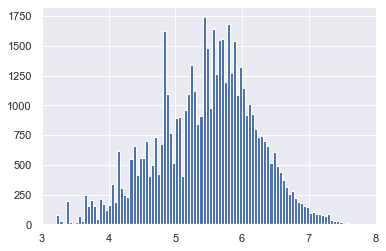

In [39]:
bookings_2016.revenue_per_stay.map(np.log).hist(bins=100)

Text(0.5, 1.0, 'Model_fit Residual Distribution')

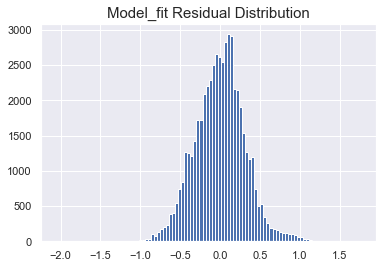

In [40]:
model_fit.resid.hist(bins=100)
plt.title('Model_fit Residual Distribution', fontsize = 15)

$$revenue per stay = 30.1210 + 95.9664*stays in weekend nights+93.5027*stays in week nights-35.2703*hotel$$

$30.1210 = commisions for city hotel$

$95.9664 if weekend and 93.5027 if weekday = revenue per night$

$35.2703 = commision disount for being a resort hotel$

### Hypothesis Testing

In [44]:
from scipy.stats import ttest_1samp
ttest_1samp(hotel_bookings_2016['adr'], 90)

Ttest_1sampResult(statistic=54.897745556949396, pvalue=0.0)

In [42]:
hotel_booking.iloc[30]

stays_in_weekend_nights            0.0
stays_in_week_nights               1.0
adults                             2.0
children                           0.0
babies                             0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
days_in_waiting_list               0.0
required_car_parking_spaces        0.0
revenue_per_stay                  72.0
arrival_date_month_August          0.0
arrival_date_month_December        0.0
arrival_date_month_February        0.0
arrival_date_month_January         1.0
arrival_date_month_July            0.0
arrival_date_month_June            0.0
arrival_date_month_March           0.0
arrival_date_month_May             0.0
arrival_date_month_November        0.0
arrival_date_month_October         0.0
arrival_date_month_September       0.0
meal_FB                            0.0
meal_HB                            1.0
meal_SC                            0.0
meal_Undefined           